In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\gayat\Downloads\Sales.csv"
data = pd.read_csv(file_path)

# Display the first five rows of the dataset
print(data.head())

# Display the column names
print(data.columns)

# Features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Mean Squared Error: 1.4374328500000009
Mean Absolute Error: 0.9179999999999993


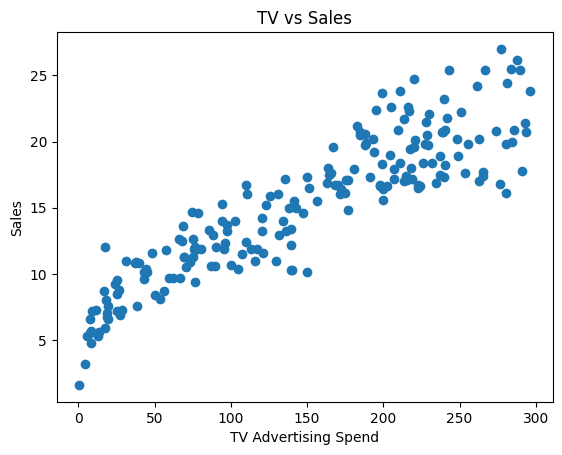

In [30]:
import matplotlib.pyplot as plt

plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()


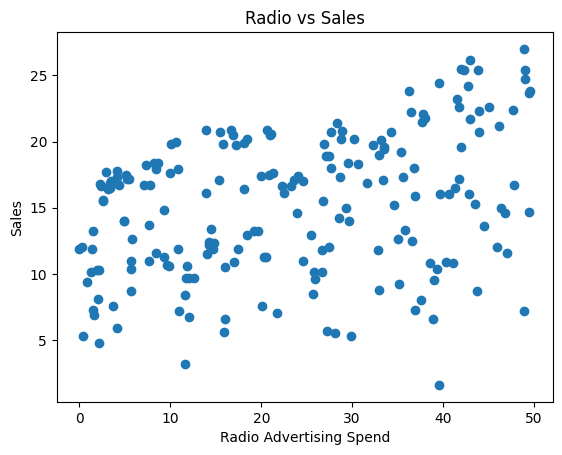

In [34]:
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.show()

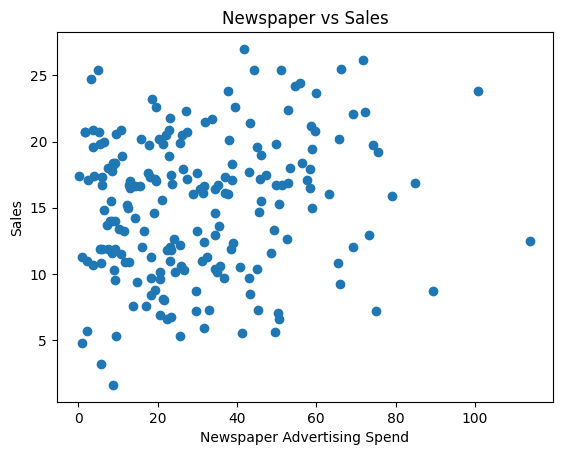

In [36]:
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.show()


In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred
model.score(X_test,y_pred)

1.0

In [48]:
#for checking how my model predict  tv      radio      news    sales
model.predict([[230.1,37.8,69.2]])# 230.1   37.8       69.2   22.1  this is in my dataset my model predict it as 22 thats good

C:\Users\gayat\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([22.018])

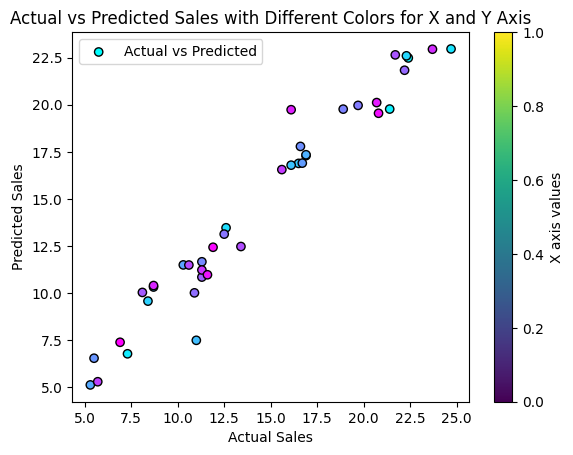

In [3]:
#Scatter Plot actual vs predicted sales 
plt.scatter(y_test, y_pred, c=colors_x, edgecolor='black', label='Actual vs Predicted')  # Using colors based on x values
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales with Different Colors for X and Y Axis')
plt.colorbar(label='X axis values')
plt.legend()
plt.show()



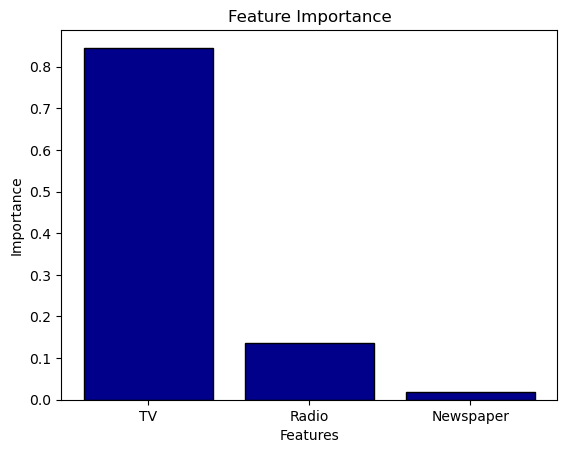

In [31]:
# Feature Importance Plot(bar plot)
feature_importance = model.feature_importances_
feature_names = X.columns
plt.bar(feature_names, feature_importance, color='darkblue', edgecolor='black')  # Set bar color to red and border color to black
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


Insight into Predictive Power:
- The plot helps you understand which features contribute most to the model’s predictions. Features with higher importance scores have a stronger influence on the target variable.
- So here the Tv features cntributes more for prediction